In [1]:
import pandas as p
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering

#pandas as pd: This library is used for data manipulation and analysis.
#matplotlib.pyplot as plt: This library is used for creating visualizations.
#from sklearn.cluster import KMeans, AgglomerativeClustering: This library provides implementations of the KMeans and AgglomerativeClustering clustering algorithms.
#KMeans clustering is a type of unsupervised machine learning algorithm that is used to group data points into a predefined number of clusters. The algorithm works by iteratively assigning data points to clusters based on their distance to the cluster centroids.

#Agglomerative clustering is another type of unsupervised machine learning algorithm that is used to group data points into clusters. The algorithm works by iteratively merging clusters until a desired number of clusters is reached.

In [2]:
df = p.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x = df.iloc[:,3:]
x

#The code x = df.iloc[:,3:] extracts all of the columns in the df DataFrame starting from the 3rd column. The iloc() method takes two arguments:
#Rows: The rows of the DataFrame to select.
#Columns: The columns of the DataFrame to select.

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


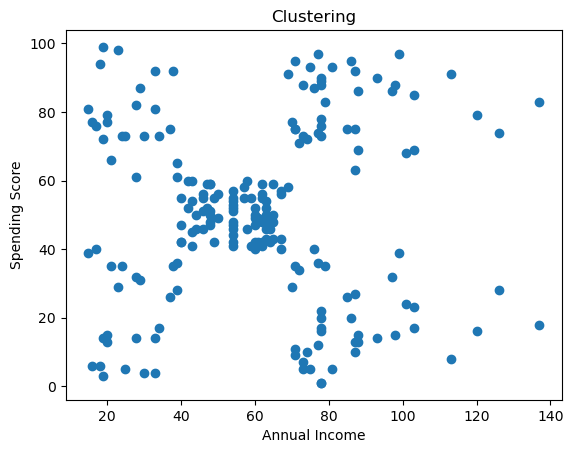

In [4]:
plt.title("Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"])

#The code plt.title("Clustering") sets the title of the plot to "Clustering". The code plt.xlabel("Annual Income") sets the x-axis label to "Annual Income". The code plt.ylabel("Spending Score") sets the y-axis label to "Spending Score". The code plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"]) creates a scatter plot of the Annual Income (k$) and Spending Score (1-100) columns in the x DataFrame.
#This code will produce a scatter plot of the data points in the x DataFrame. The data points will be colored according to their cluster labels. You can use this plot to visualize the clustered data and identify patterns in the data.

In [5]:
sse = []
for i in range(1,16):
  km = KMeans(n_clusters = i)
  km.fit_predict(x)
  sse.append(km.inertia_)
sse

#The code sse = [] creates an empty list to store the sum of squared errors (SSE) values for the different K-Means models. The code for i in range(1,16): iterates from 1 to 15. For each iteration, the following code is executed:
#The km.inertia_ attribute contains the SSE value for the K-Means model. The sse.append() method appends the SSE value to the sse list.
#Once the loop is finished, the sse list will contain the SSE values for the K-Means models with 1 to 15 clusters.

C:\Users\sanga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sanga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sanga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sanga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25331.893026866965,
 21841.97825674864,
 19731.31470326364,
 17595.28888108518,
 15823.742746763312,
 14445.596243042672,
 12830.670832109066,
 12181.674495112731]

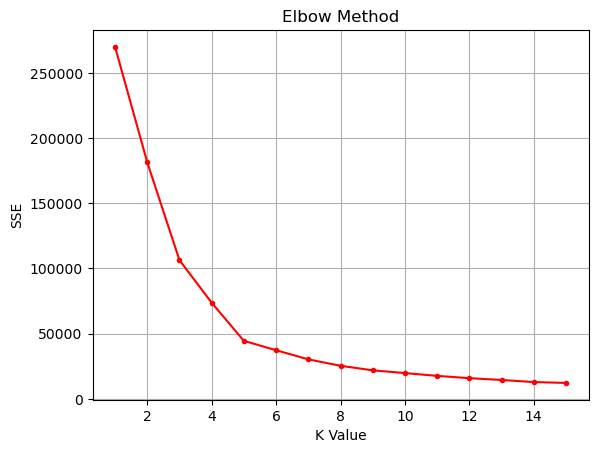

In [6]:
plt.plot(range(1,16),sse,marker='.',color='red')
plt.title("Elbow Method")
plt.xlabel("K Value")
plt.ylabel("SSE")
plt.grid()

#plt.plot(range(1,16),sse,marker='.',color='red') plots the SSE values against the number of clusters, using red dots as markers. The code plt.title("Elbow Method") sets the title of the plot to "Elbow Method". The code plt.xlabel("K Value") sets the x-axis label to "K Value". The code plt.ylabel("SSE") sets the y-axis label to "SSE". The code plt.grid() enables the grid on the plot.

#This code will produce a plot of the SSE values against the number of clusters, with red dots as markers and a grid. The title of the plot will be "Elbow Method" and the x-axis and y-axis labels will be "K Value" and "SSE", respectively.

In [7]:
from sklearn.metrics import silhouette_score
silh = []
for i in range(2,16):
  km = KMeans(n_clusters=i)
  labels = km.fit_predict(x)
  score = silhouette_score(x,labels)
  silh.append(score)
silh

#The code from sklearn.metrics import silhouette_score imports the silhouette_score() function from the sklearn.metrics module. The silhouette_score() function calculates the silhouette score for a given clustering. The silhouette score is a measure of how well each data point is assigned to its cluster.
#The code silh = [] creates an empty list to store the silhouette scores for the different K-Means models. The code for i in range(2,16): iterates from 2 to 15. For each iteration,

C:\Users\sanga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sanga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sanga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sanga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5393922132561455,
 0.5270287298101395,
 0.45426211772487085,
 0.45780808918889493,
 0.4378619689153556,
 0.437841976811071,
 0.43519291432329693,
 0.4143358139396936,
 0.4265551543950237,
 0.4147677287858187]

<BarContainer object of 14 artists>

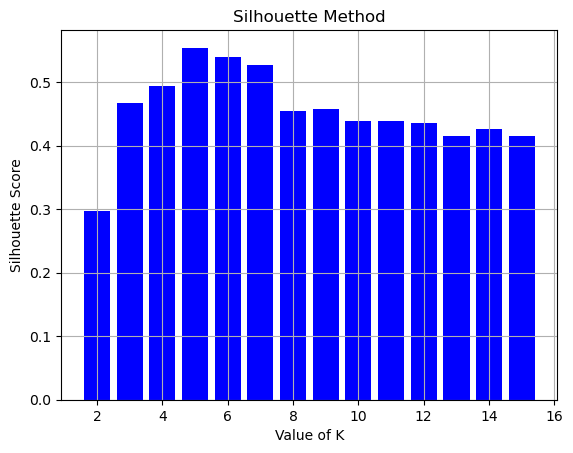

In [8]:
plt.title("Silhouette Method")
plt.xlabel("Value of K")
plt.ylabel("Silhouette Score")
plt.grid()
plt.bar(range(2,16),silh,color='blue')

#The code plt.title("Silhouette Method") sets the title of the plot to "Silhouette Method". The code plt.xlabel("Value of K") sets the x-axis label to "Value of K". The code plt.ylabel("Silhouette Score") sets the y-axis label to "Silhouette Score". The code plt.grid() enables the grid on the plot. The code plt.bar(range(2,16),silh,color='blue') creates a bar plot of the silhouette scores against the number of clusters, using blue bars.
#This code will produce a bar plot of the silhouette scores against the number of clusters, with blue bars and a grid. The title of the plot will be "Silhouette Method" and the x-axis and y-axis labels will be "Value of K" and "Silhouette Score", respectively.

In [9]:
km = KMeans(n_clusters = 5,random_state=0)
Elabels = km.fit_predict(x)
Elabels

#The code km = KMeans(n_clusters = 5,random_state=0) creates a KMeans object with 5 clusters and a random state of 0. The code Elabels = km.fit_predict(x) fits the KMeans model to the data in x and predicts the cluster labels for the data points. The Elabels variable will contain the predicted cluster labels for the data points.

C:\Users\sanga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sanga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

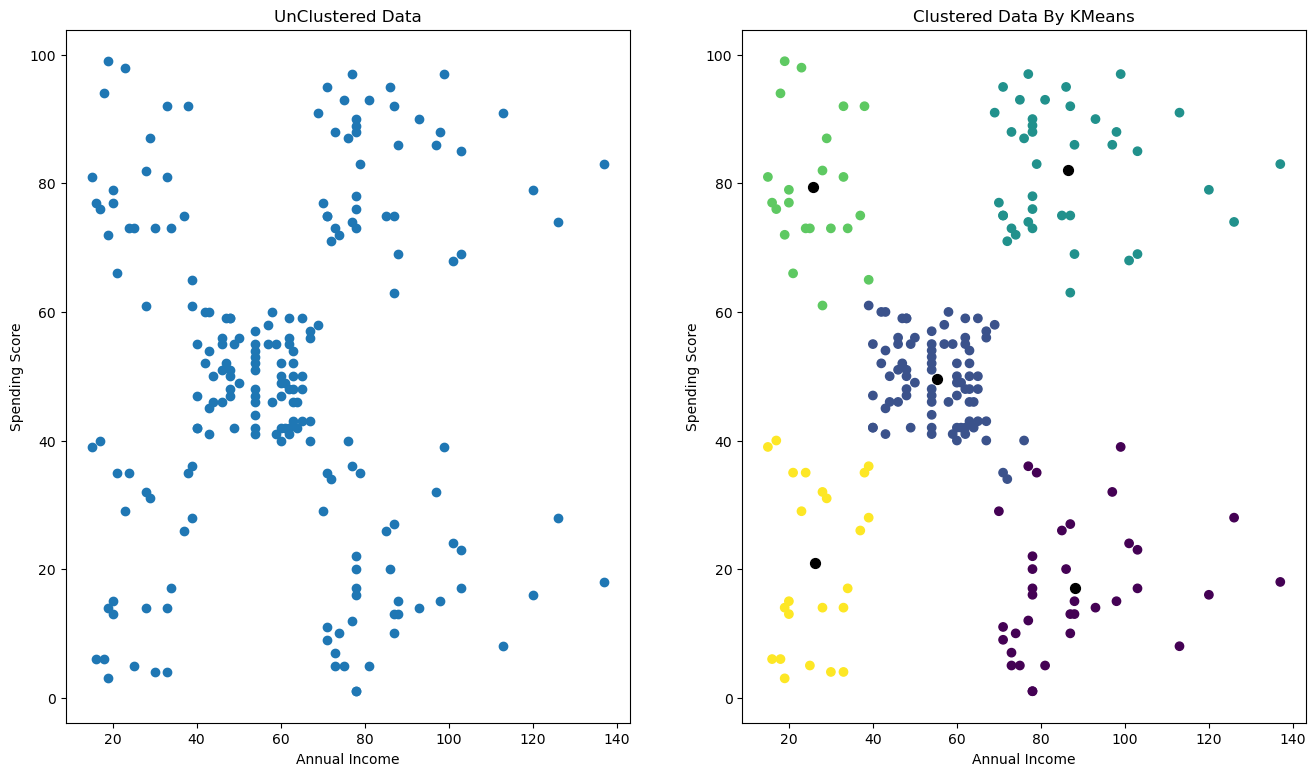

In [11]:
cent = km.cluster_centers_
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title("UnClustered Data")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"])

#The code cent = km.cluster_centers_ extracts the cluster centers from the KMeans model. The code plt.figure(figsize=(16,9)) creates a new figure with a size of 16x9 inches. The code plt.subplot(1,2,1) creates a subplot at row 1, column 2 of the figure. The code plt.title("UnClustered Data") sets the title of the subplot to "UnClustered Data". The code plt.xlabel("Annual Income") sets the x-axis label to "Annual Income". The code plt.ylabel("Spending Score") sets the y-axis label to "Spending Score". The code plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"]) creates a scatter plot of the Annual Income (k$) and Spending Score (1-100) columns in the x DataFrame.

#plt.figure(figsize=(16,9))
plt.subplot(1,2,2)
plt.title("Clustered Data By KMeans")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=Elabels)
plt.scatter(cent[:,0],cent[:,1],s=50,color='k')

#The code plt.subplot(1,2,2) creates a subplot at row 1, column 2 of the figure. The code plt.title("Clustered Data By KMeans") sets the title of the subplot to "Clustered Data By KMeans". The code plt.xlabel("Annual Income") sets the x-axis label to "Annual Income". The code plt.ylabel("Spending Score") sets the y-axis label to "Spending Score". The code plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=Elabels) creates a scatter plot of the Annual Income (k$) and Spending Score (1-100) columns in the x DataFrame, colored according to the cluster labels in the Elabels variable. The code plt.scatter(cent[:,0],cent[:,1],s=50,color='k') creates a scatter plot of the cluster centers, using black points with a size of 50.

In [12]:
km.labels_

#The km.labels_ attribute of the KMeans model contains the predicted cluster labels for the data points. This is a NumPy array of integers, where each integer represents the cluster that the data point was assigned to.

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [13]:
df[labels==3]

#The code df[labels==3] will return a subset of the DataFrame df containing only the rows where the labels column is equal to 3. This is a very useful way to filter a DataFrame based on a specific condition.

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
128,129,Male,59,71,11
130,131,Male,47,71,9
134,135,Male,20,73,5
136,137,Female,44,73,7
138,139,Male,19,74,10
140,141,Female,57,75,5
144,145,Male,25,77,12
148,149,Female,34,78,22
150,151,Male,43,78,17
152,153,Female,44,78,20


In [15]:
km.predict([[40,40]])

#The code km.predict([[40,40]]) will predict the cluster label for the data point [40,40]. The km object is a KMeans model that has been fitted to the data. The predict() method takes a list of data points as input and returns a list of cluster labels as output.



C:\Users\sanga\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

In [16]:
agl = AgglomerativeClustering(n_clusters=5)
alabels = agl.fit_predict(x)
alabels

#The code agl = AgglomerativeClustering(n_clusters=5) creates an AgglomerativeClustering object with 5 clusters. The code alabels = agl.fit_predict(x) fits the AgglomerativeClustering model to the data in x and predicts the cluster labels for the data points. The alabels variable will contain the predicted cluster labels for the data points.

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

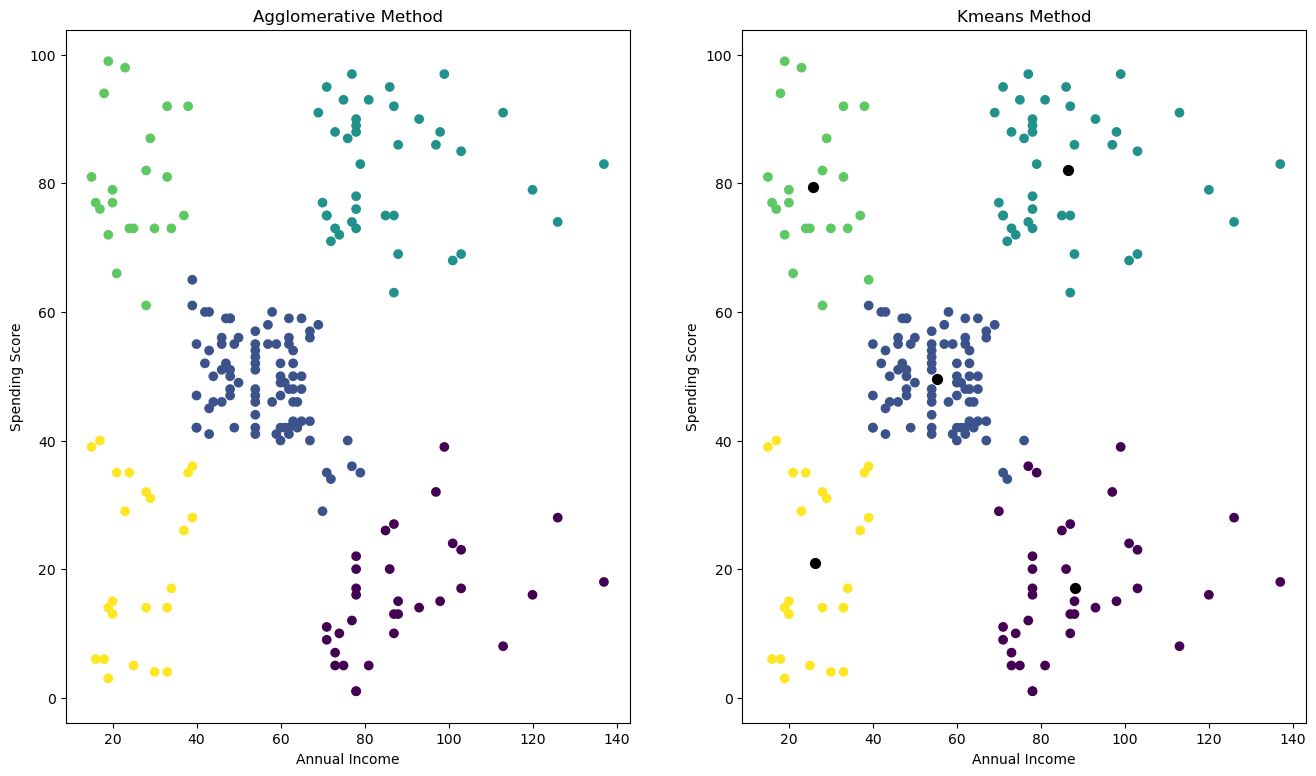

In [17]:
cent = km.cluster_centers_
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title("Agglomerative Method")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=alabels)

#The code cent = km.cluster_centers_ extracts the cluster centers from the KMeans model. The code plt.figure(figsize=(16,9)) creates a new figure with a size of 16x9 inches. The code plt.subplot(1,2,1) creates a subplot at row 1, column 2 of the figure. The code plt.title("Agglomerative Method") sets the title of the subplot to "Agglomerative Method". The code plt.xlabel("Annual Income") sets the x-axis label to "Annual Income". The code plt.ylabel("Spending Score") sets the y-axis label to "Spending Score". The code plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=alabels) creates a scatter plot of the Annual Income (k$) and Spending Score (1-100) columns in the x DataFrame, colored according to the cluster labels in the alabels variable.
# plt.figure(figsize=(16,9))
plt.subplot(1,2,2)
plt.title("Kmeans Method")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=Elabels)
plt.scatter(cent[:,0],cent[:,1],s=50,color='k')

#The code plt.subplot(1,2,2) creates a subplot at row 1, column 2 of the figure. The code plt.title("Kmeans Method") sets the title of the subplot to "Kmeans Method". The code plt.xlabel("Annual Income") sets the x-axis label to "Annual Income". The code plt.ylabel("Spending Score") sets the y-axis label to "Spending Score". The code plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=Elabels) creates a scatter plot of the Annual Income (k$) and Spending Score (1-100) columns in the x DataFrame, colored according to the cluster labels in the Elabels variable. The code plt.scatter(cent[:,0],cent[:,1],s=50,color='k') creates a scatter plot of the cluster centers, using black points with a size of 50.